In [48]:
# TODO: загнать в коллаб

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# предварительное исследование
from PIL import Image
import os
import numpy as np

path = "train_butterflies"
classes = sorted([d for d in os.listdir(path)])

total = 0
balance_ = dict()
resolutions = set()

for class_ in classes:
    class_path = os.path.join(path, class_)
    balance_[class_] = 0
    class_images = [_ for _ in os.listdir(class_path)]

    for image in class_images:
        img_path = os.path.join(class_path, image)
        total += 1
        balance_[class_] += 1
        with Image.open(img_path) as img:
            width, height = img.size
            resolutions.add((width, height))

balance = sorted(balance_.items(), key=lambda item: item[1])
print("Всего изображений", total) # 4955

Всего изображений 4955


In [49]:
print("Разрешение:", resolutions)

Разрешение: {(224, 224)}


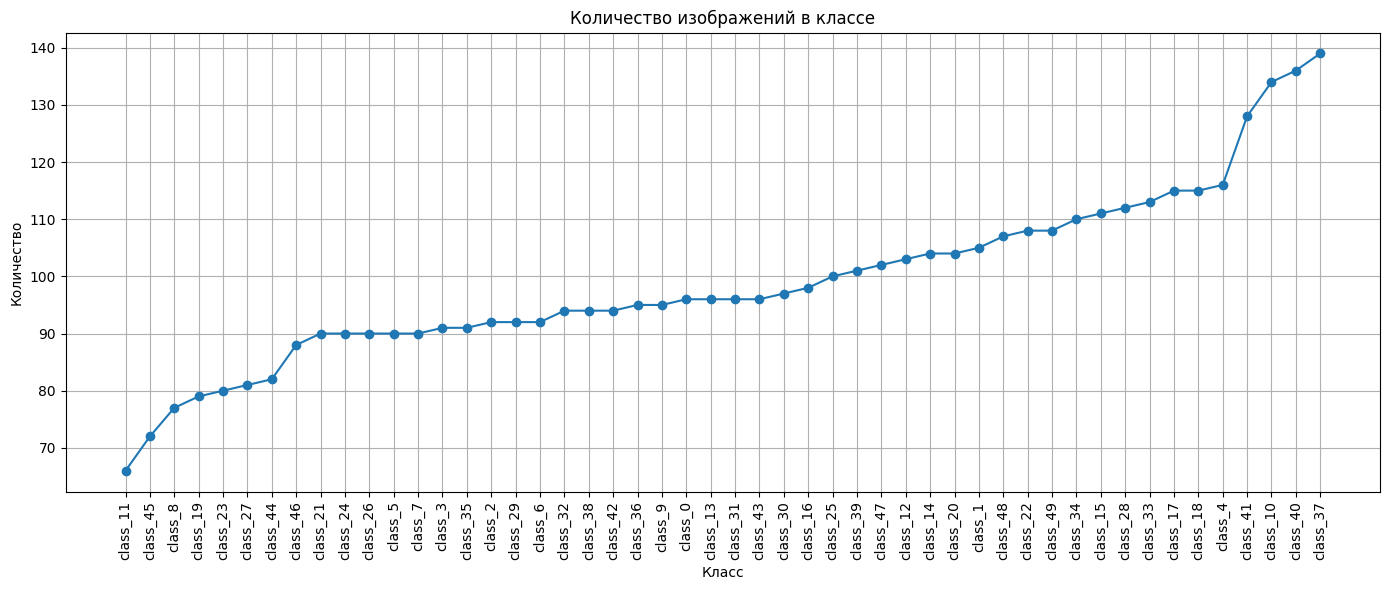

In [50]:
classes = [item[0] for item in balance]
values = [item[1] for item in balance]

plt.figure(figsize=(14, 6))
plt.plot(classes, values, marker='o')
plt.xticks(rotation=90)
plt.title('Количество изображений в классе')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# сделаем аугментацию
import random
from torchvision import transforms

max_balance = max([item[1] for item in balance])

augment = transforms.Compose([
    transforms.RandomResizedCrop(size=224, scale=(0.75, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),

    transforms.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.1
    ),

    transforms.RandomAutocontrast(p=0.5),
    transforms.RandomAdjustSharpness(sharpness_factor=2.0, p=0.3),
])

for class_ in classes:
    class_path = os.path.join(path, class_)
    class_images = [_ for _ in os.listdir(class_path)]

    to_add = max_balance - balance_[class_]
    if to_add <= 0:
        continue

    # print(f"Класс {class_}: есть {balance_[class_]}, нужно добавить {to_add}")

    for i in range(to_add):
        prey = random.choice(class_images)
        img_path = os.path.join(class_path, prey)
        img = Image.open(img_path).convert("RGB")

        aug_img = augment(img)

        name, ext = os.path.splitext(prey)
        new_fname = f"{name}_aug_{i}{ext}"
        aug_img.save(os.path.join(class_path, new_fname))

139


In [ ]:
# подготовка данных для обучения
# Создать тренировочную и тестовую подвыборки для обучения и тестирования работы моделей
# Создать класс на фреймворке PyTorch для создания датасета
# Создать loader для передачи данных в модель нейронной сети

